In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\Users\asus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset=pd.read_csv("C:\\Users\\asus\\Desktop\\diabetes_prediction_dataset.csv")

In [3]:
dataset.shape

(100000, 9)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
dataset.describe

<bound method NDFrame.describe of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0            

In [6]:
dataset.isnull()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [7]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<AxesSubplot:xlabel='diabetes', ylabel='count'>

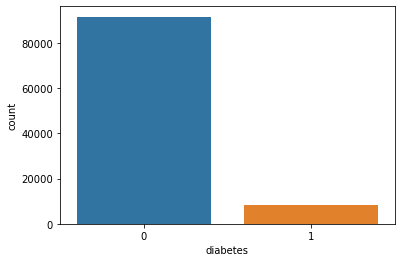

In [8]:
sns.countplot(x = 'diabetes',data = dataset)

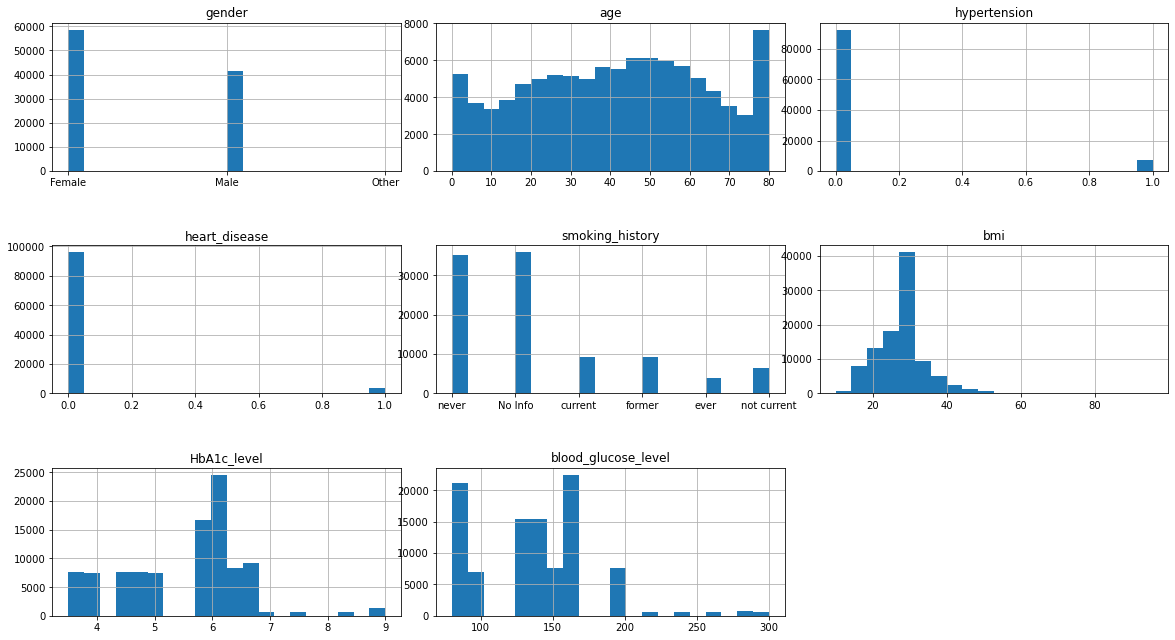

In [9]:
import itertools

col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

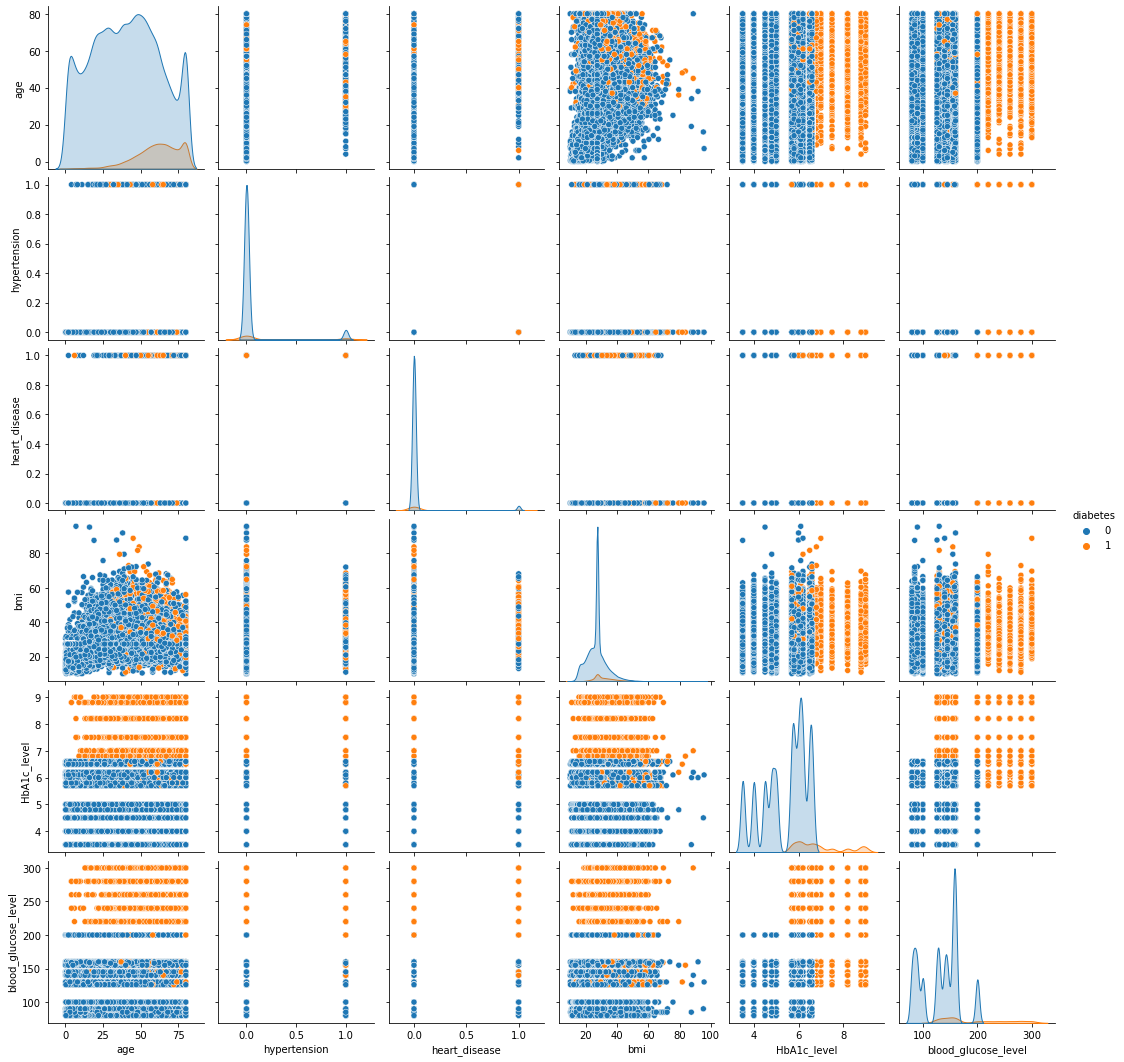

In [12]:
sns.pairplot(data = dataset, hue = 'diabetes')
plt.show()

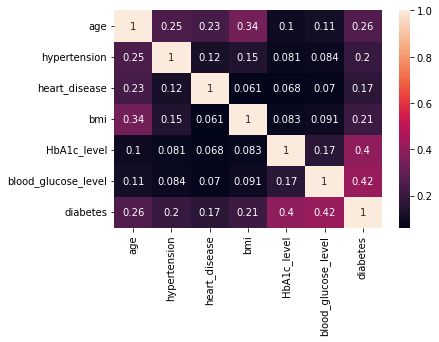

In [13]:

sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [16]:
X = dataset.iloc[:, [1, 2, 3, 5]].values
Y = dataset.iloc[:, 8].values


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [18]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (80000, 4)
X_test shape: (20000, 4)
Y_train shape: (80000,)
Y_test shape: (20000,)


In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)
Y_pred_logreg = logreg.predict(X_test)


In [27]:
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
print("Accuracy ->", accuracy_logreg)

Accuracy -> 0.9141


In [28]:
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)


In [29]:
print("Logistic Regression: " + str(accuracy_logreg * 100))


Logistic Regression: 91.41


In [30]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_logreg)
cm


array([[18178,   114],
       [ 1604,   104]], dtype=int64)

<AxesSubplot:>

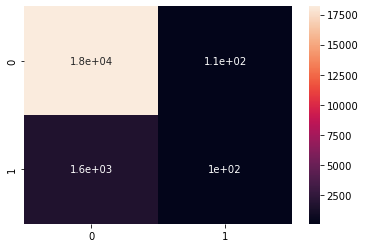

In [31]:
sns.heatmap(pd.DataFrame(cm), annot=True)


In [32]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_logreg))


              precision    recall  f1-score   support

           0       0.92      0.99      0.95     18292
           1       0.48      0.06      0.11      1708

    accuracy                           0.91     20000
   macro avg       0.70      0.53      0.53     20000
weighted avg       0.88      0.91      0.88     20000

